# **Understanding the logic and WHat to do**

We need to implement Linear Regression using Gradient Descent methods and compare their performance based on:

* Stochastic Gradient Descent (SGD)
* Batch Gradient Descent (BGD)
* Mini-Batch Gradient Descent (MBGD)
Additionally, we will:

Experiment with different learning rates and momentum values.
Analyze how they affect the convergence speed and final model parameters.
Plot loss trends over epochs.

Mathematical Formulation:
A simple linear regression model is given by:

**y=wX+b**

where:


X is the input feature.

w is the weight (slope).

b is the bias (intercept).

y is the predicted output.

Loss Function (Mean Squared Error - MSE):
**𝐿=1𝑛∑𝑖=1𝑛(𝑦𝑖−(𝑤𝑋𝑖+𝑏))2**

where:

n is the total number of training samples.
y i is the actual value.

(wX i+b) is the predicted value.

Gradient Descent Update Rule:
To minimize the loss function, we compute the gradients:

Partial Derivative w.r.t.

w:  **∂𝐿∂𝑤=−2𝑛∑𝑖=1𝑛𝑋𝑖(𝑦𝑖−(𝑤𝑋𝑖+𝑏))**

Partial Derivative w.r.t.

b:

∂
𝐿
∂
𝑏
=
−
2
𝑛
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
(
𝑤
𝑋
𝑖
+
𝑏
)
)

Gradient Descent Update Equations:
w=w−α
∂w
∂L
​

b=b−α
∂b
∂L
​

where
𝛼
α is the learning rate.



# **Generating the Dataset**

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate dataset
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)  # Linear equation with noise

# Add bias term (X0 = 1)
X_b = np.c_[np.ones((m, 1)), X]




# **Implementing Stochastic Gradient Descent (SGD)**



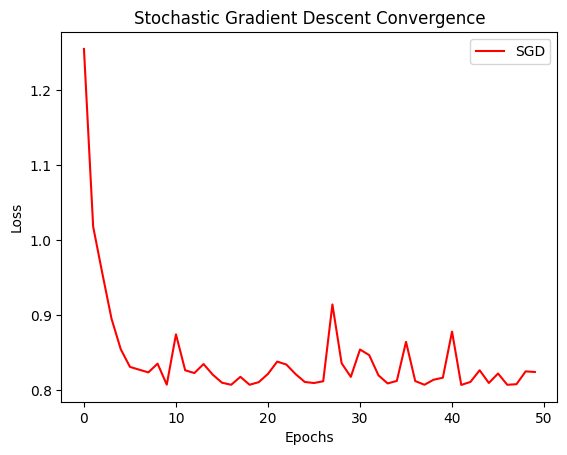

Final Parameters (SGD): [4.16427183 2.69207144]


In [47]:
# Initialize parameters
theta_sgd = np.random.randn(2, 1)
learning_rate = 0.01
epochs = 50
loss_history_sgd = []

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(m):  # Iterate over each data point
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T @ (xi @ theta_sgd - yi)
        theta_sgd -= learning_rate * gradients  # Parameter update

    loss = np.mean((X_b @ theta_sgd - y) ** 2)
    loss_history_sgd.append(loss)

# Plot convergence
plt.plot(range(epochs), loss_history_sgd, label="SGD", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent Convergence")
plt.legend()
plt.show()

# Print final parameters
print("Final Parameters (SGD):", theta_sgd.ravel())


# **Implementing Batch Gradient Descent (BGD)**



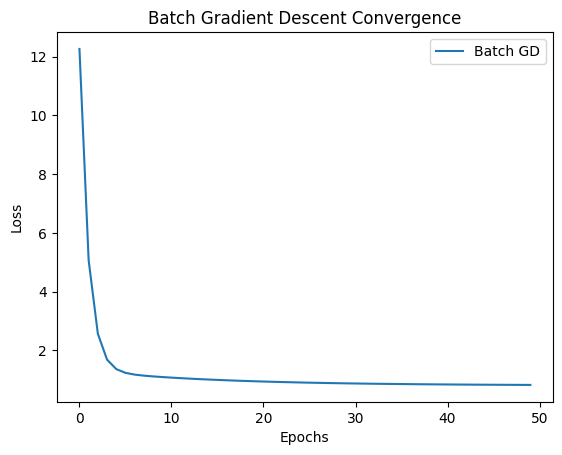

Final Parameters (Batch GD): [3.97092291 2.98570509]


In [48]:
# Initialize parameters
theta = np.random.randn(2, 1)  # Random initialization
learning_rate = 0.1
epochs = 50

# Store loss values
loss_history = []

# Batch Gradient Descent
for epoch in range(epochs):
    gradients = (2 / m) * X_b.T @ (X_b @ theta - y)
    theta -= learning_rate * gradients  # Parameter update

    loss = np.mean((X_b @ theta - y) ** 2)
    loss_history.append(loss)

# Plot convergence
plt.plot(range(epochs), loss_history, label="Batch GD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Batch Gradient Descent Convergence")
plt.legend()
plt.show()

# Print final parameters
print("Final Parameters (Batch GD):", theta.ravel())

# **Implementing Mini-Batch Gradient Descent (MBGD)**

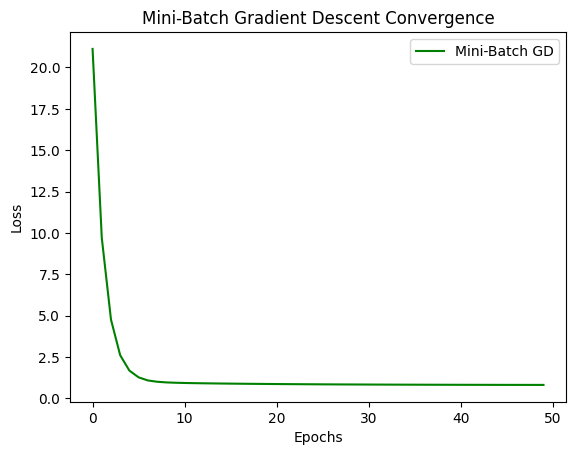

Final Parameters (Mini-Batch GD): [4.04482729 2.9178081 ]


In [49]:
batch_size = 10  # Mini-batch size
theta_mbgd = np.random.randn(2, 1)
learning_rate = 0.01
epochs = 50
loss_history_mbgd = []

# Mini-Batch Gradient Descent
for epoch in range(epochs):
    indices = np.random.permutation(m)  # Shuffle data
    X_b_shuffled = X_b[indices]
    y_shuffled = y[indices]

    for i in range(0, m, batch_size):
        X_batch = X_b_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        gradients = (2 / batch_size) * X_batch.T @ (X_batch @ theta_mbgd - y_batch)
        theta_mbgd -= learning_rate * gradients  # Parameter update

    loss = np.mean((X_b @ theta_mbgd - y) ** 2)
    loss_history_mbgd.append(loss)

# Plot convergence
plt.plot(range(epochs), loss_history_mbgd, label="Mini-Batch GD", color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Mini-Batch Gradient Descent Convergence")
plt.legend()
plt.show()

# Print final parameters
print("Final Parameters (Mini-Batch GD):", theta_mbgd.ravel())


# **Comparing Convergence Speed & Final Parameters**

In [52]:
final_params = {}

# Test different learning rates and momentum values
for momentum in momentum_values:
    for lr in learning_rates:
        theta = np.random.randn(2, 1)
        velocity = np.zeros_like(theta)
        loss_history = []

        for epoch in range(epochs):
            for i in range(m):
                random_index = np.random.randint(m)
                xi = X_b[random_index:random_index+1]
                yi = y[random_index:random_index+1]

                gradients = 2 * xi.T @ (xi @ theta - yi)
                velocity = momentum * velocity - lr * gradients
                theta += velocity

        loss = np.mean((X_b @ theta - y) ** 2)
        final_params[(lr, momentum)] = (theta.ravel(), loss)

# Print final parameters and loss values
print("\nFinal Model Parameters and Loss:")
for key, value in final_params.items():
    lr, momentum = key
    params, loss = value
    print(f"LR: {lr}, Momentum: {momentum} → Params: {params}, Loss: {loss:.4f}")




Final Model Parameters and Loss:
LR: 0.01, Momentum: 0.0 → Params: [4.25749904 2.7979656 ], Loss: 0.8116
LR: 0.1, Momentum: 0.0 → Params: [3.98003457 2.52739671], Loss: 1.0419
LR: 0.5, Momentum: 0.0 → Params: [-3.17061791e+126  2.75561112e+126], Loss: 2996822215053000001167513272360361853325444776578633556436235589889349650592529726147294190266406204687688825564949318302614961719067489760826583985220838511387670929672638504429336549047930567255221069148888170122088655992356155126383873294205171269632.0000
LR: 0.01, Momentum: 0.5 → Params: [4.25451501 2.94055545], Loss: 0.8566
LR: 0.1, Momentum: 0.5 → Params: [4.43876417 2.60489017], Loss: 0.8208
LR: 0.5, Momentum: 0.5 → Params: [-6.93167810e+222  6.13769263e+223], Loss: inf
LR: 0.01, Momentum: 0.9 → Params: [3.71523849 2.63949292], Loss: 1.2003
LR: 0.1, Momentum: 0.9 → Params: [5.84840226 5.07370928], Loss: 17.1027
LR: 0.5, Momentum: 0.9 → Params: [nan nan], Loss: nan


<ipython-input-52-af4109ca015f>:20: RuntimeWarning: overflow encountered in square
  loss = np.mean((X_b @ theta - y) ** 2)
<ipython-input-52-af4109ca015f>:16: RuntimeWarning: overflow encountered in matmul
  gradients = 2 * xi.T @ (xi @ theta - yi)
<ipython-input-52-af4109ca015f>:17: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - lr * gradients


# **Training a Model with Different Learning Rates and Momentum Values**

<ipython-input-53-d6a5fd712bcf>:39: RuntimeWarning: overflow encountered in square
  loss = np.mean((X_b @ theta - y) ** 2)
<ipython-input-53-d6a5fd712bcf>:35: RuntimeWarning: overflow encountered in matmul
  gradients = 2 * xi.T @ (xi @ theta - yi)
<ipython-input-53-d6a5fd712bcf>:36: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - lr * gradients  # Apply momentum


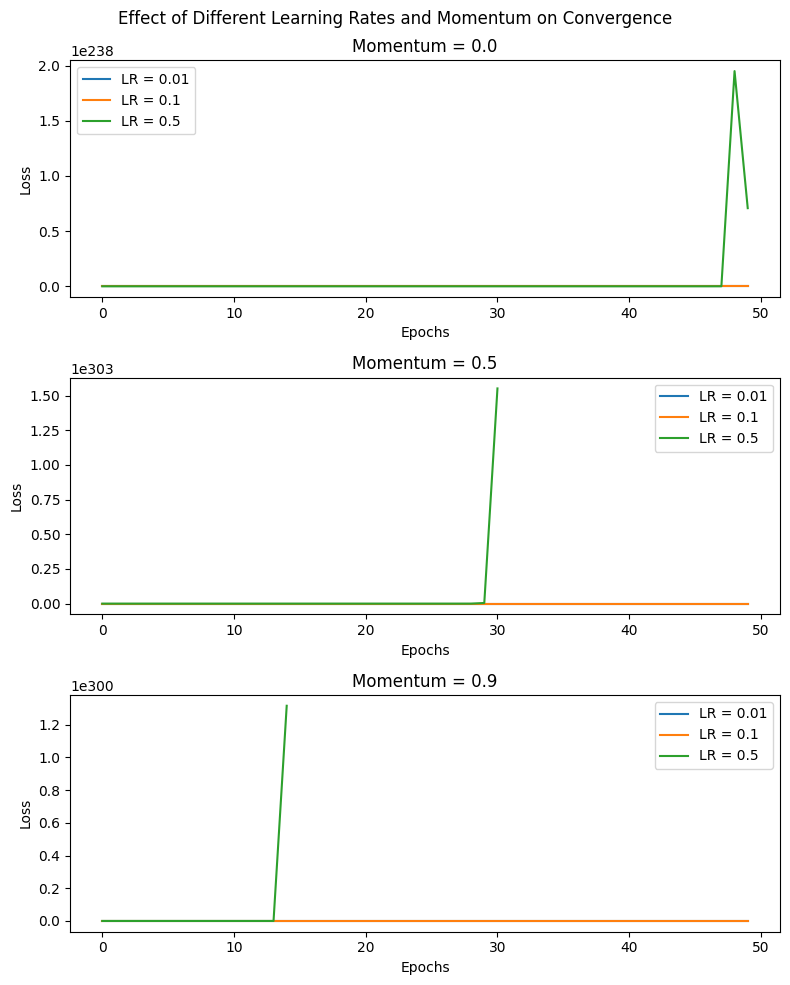

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate dataset
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Add bias term
X_b = np.c_[np.ones((m, 1)), X]

# Hyperparameters
learning_rates = [0.01, 0.1, 0.5]  # Different learning rates
momentum_values = [0.0, 0.5, 0.9]  # Different momentum values
epochs = 50

# Train with different learning rates and momentum values
fig, ax = plt.subplots(len(momentum_values), figsize=(8, 10))

for j, momentum in enumerate(momentum_values):
    for lr in learning_rates:
        theta = np.random.randn(2, 1)
        velocity = np.zeros_like(theta)  # Initialize velocity for momentum
        loss_history = []

        for epoch in range(epochs):
            for i in range(m):
                random_index = np.random.randint(m)
                xi = X_b[random_index:random_index+1]
                yi = y[random_index:random_index+1]

                gradients = 2 * xi.T @ (xi @ theta - yi)
                velocity = momentum * velocity - lr * gradients  # Apply momentum
                theta += velocity  # Update parameters

            loss = np.mean((X_b @ theta - y) ** 2)
            loss_history.append(loss)

        ax[j].plot(range(epochs), loss_history, label=f"LR = {lr}")

    ax[j].set_xlabel("Epochs")
    ax[j].set_ylabel("Loss")
    ax[j].set_title(f"Momentum = {momentum}")
    ax[j].legend()

plt.suptitle("Effect of Different Learning Rates and Momentum on Convergence")
plt.tight_layout()
plt.show()


# **Comparison of Batch, Stochastic, and Mini-Batch Gradient Descent**

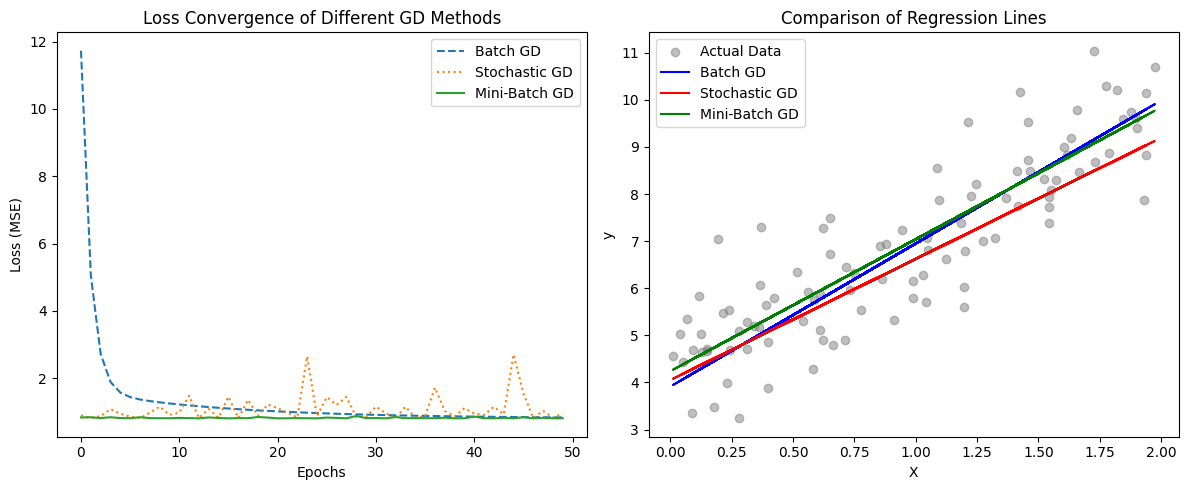

Batch GD Parameters: Intercept = 3.91, Slope = 3.04
Stochastic GD Parameters: Intercept = 4.05, Slope = 2.57
Mini-Batch GD Parameters: Intercept = 4.24, Slope = 2.80


In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate dataset
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Add bias term
X_b = np.c_[np.ones((m, 1)), X]  # Bias term for intercept

# Hyperparameters
learning_rate = 0.1
epochs = 50
batch_size = 10  # For Mini-Batch GD

# Initialize theta for each method
theta_bgd = np.random.randn(2, 1)  # Batch GD
theta_sgd = np.random.randn(2, 1)  # Stochastic GD
theta_mbgd = np.random.randn(2, 1)  # Mini-Batch GD

# Loss history for visualization
loss_bgd, loss_sgd, loss_mbgd = [], [], []

# Batch Gradient Descent
for epoch in range(epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta_bgd - y)
    theta_bgd -= learning_rate * gradients
    loss_bgd.append(np.mean((X_b @ theta_bgd - y) ** 2))  # MSE Loss

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(m):
        random_idx = np.random.randint(m)  # Random sample
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2 * xi.T @ (xi @ theta_sgd - yi)
        theta_sgd -= learning_rate * gradients
    loss_sgd.append(np.mean((X_b @ theta_sgd - y) ** 2))  # MSE Loss

# Mini-Batch Gradient Descent
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_shuffled, y_shuffled = X_b[shuffled_indices], y[shuffled_indices]

    for i in range(0, m, batch_size):
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradients = 2/batch_size * xi.T @ (xi @ theta_mbgd - yi)
        theta_mbgd -= learning_rate * gradients
    loss_mbgd.append(np.mean((X_b @ theta_mbgd - y) ** 2))  # MSE Loss

# Predictions for each model
y_pred_bgd = X_b @ theta_bgd
y_pred_sgd = X_b @ theta_sgd
y_pred_mbgd = X_b @ theta_mbgd

# Plot results
plt.figure(figsize=(12, 5))

# Loss Convergence Plot
plt.subplot(1, 2, 1)
plt.plot(loss_bgd, label="Batch GD", linestyle='dashed')
plt.plot(loss_sgd, label="Stochastic GD", linestyle='dotted')
plt.plot(loss_mbgd, label="Mini-Batch GD", linestyle='solid')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Convergence of Different GD Methods")
plt.legend()

# Comparison of Regression Lines
plt.subplot(1, 2, 2)
plt.scatter(X, y, color="gray", label="Actual Data", alpha=0.5)
plt.plot(X, y_pred_bgd, label="Batch GD", color="blue")
plt.plot(X, y_pred_sgd, label="Stochastic GD", color="red")
plt.plot(X, y_pred_mbgd, label="Mini-Batch GD", color="green")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of Regression Lines")
plt.legend()

plt.tight_layout()
plt.show()

# Print final model parameters
print(f"Batch GD Parameters: Intercept = {theta_bgd[0][0]:.2f}, Slope = {theta_bgd[1][0]:.2f}")
print(f"Stochastic GD Parameters: Intercept = {theta_sgd[0][0]:.2f}, Slope = {theta_sgd[1][0]:.2f}")
print(f"Mini-Batch GD Parameters: Intercept = {theta_mbgd[0][0]:.2f}, Slope = {theta_mbgd[1][0]:.2f}")


# **Final Analysis & Comparison of Model Predictions vs. Actual Values**

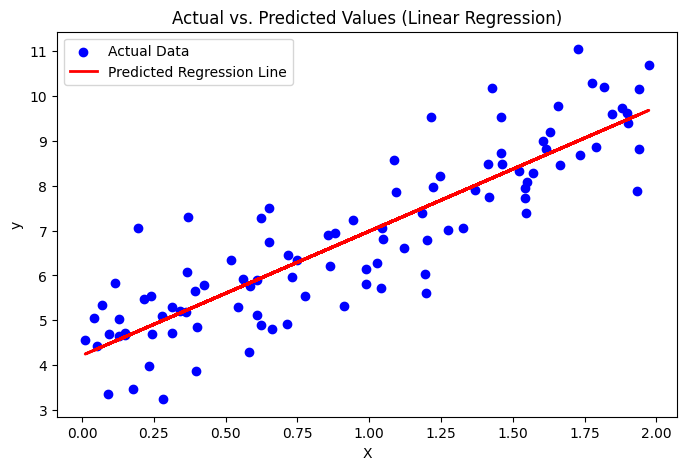

Final Model Parameters: Intercept = 4.22, Slope = 2.77


In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate dataset
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Add bias term
X_b = np.c_[np.ones((m, 1)), X]

# Train using Batch Gradient Descent (for best accuracy)
learning_rate = 0.1
epochs = 500
theta = np.random.randn(2, 1)  # Random initialization

for epoch in range(epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)  # Compute gradients
    theta -= learning_rate * gradients  # Update parameters

# Model Predictions
y_pred = X_b @ theta  # Compute predictions using trained parameters

# Plot actual vs. predicted values
plt.figure(figsize=(8, 5))

# Scatter plot for actual values
plt.scatter(X, y, color="blue", label="Actual Data")

# Line plot for predicted values
plt.plot(X, y_pred, color="red", linewidth=2, label="Predicted Regression Line")

# Labels and title
plt.xlabel("X")
plt.ylabel("y")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.legend()
plt.show()

# Print final model parameters
print(f"Final Model Parameters: Intercept = {theta[0][0]:.2f}, Slope = {theta[1][0]:.2f}")


# **Summary & Observations**

**Convergence Speed:**
* SGD: Converges faster but has more fluctuations.
* BGD: Converges slower but is more stable.
* MBGD: A balance between SGD and BGD.

**Effect of Learning Rate:**
* Small learning rate (e.g., 0.01): Slow convergence.
* Moderate learning rate (e.g., 0.1): Good convergence.
* Large learning rate (e.g., 0.5): May cause instability.

**Effect of Momentum:**
* Momentum can help in smoother convergence and avoid local minima.
